# Installing Dependant Libraries 

In [1]:
#!pip install wptools
#!pip install wikipedia
#!pip install wordcloud


# Importing Required Libraries 

In [2]:
import re 
import json
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import wptools
import wikipedia

%matplotlib inline
plt.style.use('ggplot')
print('wptools version : {}'.format(wptools.__version__)) # checking the installed version

wptools version : 0.4.17


# To get Channel Statistics

In [3]:
# To fetch the csv file
fname=pd.read_csv("/Users/sheebamoghal/fortune_500_companies.csv")

In [4]:
# scrapped data from previous section
fname = 'fortune_500_companies.csv'
df = pd.read_csv(fname)             # reading the csv file as a pandas df
df.head()                           # displaying the first 5 rows

,rank,company_name,company_website
0,1,Walmart,http://www.stock.walmart.com
1,2,Exxon Mobil,http://www.exxonmobil.com
2,3,Berkshire Hathaway,http://www.berkshirehathaway.com
3,4,Apple,http://www.apple.com
4,5,UnitedHealth Group,http://www.unitedhealthgroup.com


In [5]:
no_of_companies = 20                        # no of companies i was interested in 
df_sub = df.iloc[:no_of_companies, :].copy() # only selecting the top 10 companies
companies = df_sub['company_name'].tolist()  # converting the column to a list

In [6]:
# taking a brief look at this
for i, j in enumerate(companies):   # looping through the list of 10 company 
    print('{}. {}'.format(i+1, j))  # printing out the same

1. Walmart
2. Exxon Mobil
3. Berkshire Hathaway
4. Apple
5. UnitedHealth Group
6. McKesson
7. CVS Health
8. Amazon.com
9. AT&T
10. General Motors
11. Ford Motor
12. AmerisourceBergen
13. Chevron
14. Cardinal Health
15. Costco
16. Verizon
17. Kroger
18. General Electric
19. Walgreens Boots Alliance
20. JPMorgan Chase


In [7]:
# One of the main problems is when you look at the data that the names are in 
# accordance to their actual registered names due to which we try to find their probable names
# using the wikipedia package
wiki_search = [{company : wikipedia.search(company)} for company in companies]

In [8]:
for idx, company in enumerate(wiki_search):
    for i, j in company.items():
        print('{}. {} :\n{}'.format(idx+1, i ,', '.join(j)))
        print('\n')

1. Walmart :
Walmart, Criticism of Walmart, Walmarting, Walmart Labs, History of Walmart, Walmart (disambiguation), Walmart Canada, List of Walmart brands, Asda, Doug McMillon


2. Exxon Mobil :
ExxonMobil, Mobil, History of ExxonMobil, Exxon Valdez oil spill, Esso, ExxonMobil climate change controversy, Rex Tillerson, ExxonMobil Nigeria, Mobil 1, Exxon Valdez


3. Berkshire Hathaway :
Berkshire Hathaway, Berkshire Hathaway Energy, List of assets owned by Berkshire Hathaway, Warren Buffett, List of Berkshire Hathaway publications, Ajit Jain, Oliver Chace, The World's Billionaires, Berkshire Hathaway Assurance, Duracell


4. Apple :
Apple, Apple Inc., Apple (disambiguation), MacOS, IPhone, Apple silicon, Apples to Apples, IOS, Custard apple, Apple Music


5. UnitedHealth Group :
UnitedHealth Group, Optum, Pharmacy benefit management, William W. McGuire, Andrew Witty, PacifiCare Health Systems, Stephen J. Hemsley, Oxford Health Plans, Catamaran Corporation, Amelia Warren Tyagi


6. McKes

In [9]:
most_probable = [(company, wiki_search[i][company][0]) for i, company in enumerate(companies)]
companies = [x[1] for x in most_probable]

print(most_probable)


[('Walmart', 'Walmart'), ('Exxon Mobil', 'ExxonMobil'), ('Berkshire Hathaway', 'Berkshire Hathaway'), ('Apple', 'Apple'), ('UnitedHealth Group', 'UnitedHealth Group'), ('McKesson', 'McKesson Corporation'), ('CVS Health', 'CVS Health'), ('Amazon.com', 'Amazon (company)'), ('AT&T', 'AT&T'), ('General Motors', 'General Motors'), ('Ford Motor', 'Ford Motor Company'), ('AmerisourceBergen', 'AmerisourceBergen'), ('Chevron', 'Chevron Corporation'), ('Cardinal Health', 'Cardinal Health'), ('Costco', 'Costco'), ('Verizon', 'Verizon Communications'), ('Kroger', 'Kroger'), ('General Electric', 'General Electric'), ('Walgreens Boots Alliance', 'Walgreens Boots Alliance'), ('JPMorgan Chase', 'JPMorgan Chase')]


In the above, you can see that certain names are not in accordance to their probable names for which changes will be made

In [10]:
[('Walmart', 'Walmart'), ('Exxon Mobil', 'ExxonMobil'), ('Berkshire Hathaway', 'Berkshire Hathaway'), ('Apple', 'Apple'), ('UnitedHealth Group', 'UnitedHealth Group'), ('McKesson', 'McKesson Corporation'), ('CVS Health', 'CVS Health'), ('Amazon.com', 'Amazon (company)'), ('AT&T', 'AT&T'), ('General Motors', 'General Motors')]

[('Walmart', 'Walmart'),
 ('Exxon Mobil', 'ExxonMobil'),
 ('Berkshire Hathaway', 'Berkshire Hathaway'),
 ('Apple', 'Apple'),
 ('UnitedHealth Group', 'UnitedHealth Group'),
 ('McKesson', 'McKesson Corporation'),
 ('CVS Health', 'CVS Health'),
 ('Amazon.com', 'Amazon (company)'),
 ('AT&T', 'AT&T'),
 ('General Motors', 'General Motors')]

In [11]:
companies[companies.index('Apple')] = 'Apple Inc.' # replacing "Apple"
print(companies) # final list of wikipedia article titles

['Walmart', 'ExxonMobil', 'Berkshire Hathaway', 'Apple Inc.', 'UnitedHealth Group', 'McKesson Corporation', 'CVS Health', 'Amazon (company)', 'AT&T', 'General Motors', 'Ford Motor Company', 'AmerisourceBergen', 'Chevron Corporation', 'Cardinal Health', 'Costco', 'Verizon Communications', 'Kroger', 'General Electric', 'Walgreens Boots Alliance', 'JPMorgan Chase']


['Walmart', 'ExxonMobil', 'Berkshire Hathaway', 'Apple Inc.', 'UnitedHealth Group', 'McKesson Corporation', 'CVS Health', 'Amazon (company)', 'AT&T', 'General Motors']

In [12]:
# Trying to get information using the 'wptools' to get all the data. Here, we do it for 'Apple'
page = wptools.page('Apple Inc.')
page.get_parse() 

en.wikipedia.org (parse) Apple Inc.
en.wikipedia.org (imageinfo) File:Apple park cupertino 2019.jpg
Apple Inc. (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Apple par...
  infobox: <dict(36)> name, logo, logo_size, image, image_size, im...
  iwlinks: <list(5)> https://commons.wikimedia.org/wiki/Apple_Inc....
  pageid: 856
  parsetree: <str(362877)> <root><template><title>Short descriptio...
  requests: <list(2)> parse, imageinfo
  title: Apple Inc.
  wikibase: Q312
  wikidata_url: https://www.wikidata.org/wiki/Q312
  wikitext: <str(295025)> {{Short description|American multination...
}


In [13]:
page.data.keys()


dict_keys(['requests', 'iwlinks', 'pageid', 'wikitext', 'parsetree', 'infobox', 'title', 'wikibase', 'wikidata_url', 'image'])

In [14]:
# Getting info
page.data['infobox']

{'name': 'Apple Inc.',
 'logo': 'Apple logo black.svg',
 'logo_size': '80px',
 'image': 'Apple park cupertino 2019.jpg',
 'image_size': '260px',
 'image_caption': "[[Apple Park]], the company's headquarters in [[Cupertino, California]] within [[Silicon Valley]]",
 'former_name': '{{Unbulleted list|\n| Apple Computer Company (1976–1977)\n| Apple Computer, Inc. (1977–2007)}}',
 'type': '[[Public company|Public]]',
 'traded_as': '{{Unbulleted list | |NASDAQ|AAPL| | [[Nasdaq-100]] component | [[Dow Jones Industrial Average|DJIA]] component | [[S&P 100]] component | [[S&P 500]] component}} {{NASDAQ|AAPL}}',
 'ISIN': 'US0378331005',
 'industry': '{{Unbulleted list\n|[[Consumer electronics]]\n|[[Software services]]\n|[[Online services]]}}',
 'founded': '{{Start date and age|1976|04|01}} in [[Los Altos, California]], U.S.',
 'founders': '{{Unbulleted list | [[Steve Jobs]] | [[Steve Wozniak]] | [[Ronald Wayne]]}}',
 'hq_location': '[[Apple Park|1 Apple Park Way]]',
 'hq_location_city': '[[Cuper

In [15]:
# Fromt the infobox above, I define the list of features I would want. Personally feel that the ones below are important
wiki_data = []
# attributes of interest contained within the wiki infoboxes
features = ['founder', 'location_country', 'revenue', 'operating_income', 'net_income', 'assets',
        'equity', 'type', 'industry', 'products', 'num_employees']

In [16]:
for company in companies:    
    page = wptools.page(company) # create a page object
    try:
        page.get_parse() # call the API and parse the data
        if page.data['infobox'] != None: # When there is presence of some information
            # if infobox is present
            infobox = page.data['infobox']
            # get data for the interested features/attributes
            data = { feature : infobox[feature] if feature in infobox else '' 
                         for feature in features }
        else:
            data = { feature : '' for feature in features }

        data['company_name'] = company
        wiki_data.append(data)

    except KeyError:
        pass

en.wikipedia.org (parse) Walmart
en.wikipedia.org (imageinfo) File:Walmart Home Office.jpg
Walmart (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Walmart H...
  infobox: <dict(30)> name, logo, logo_caption, image, image_size,...
  iwlinks: <list(2)> https://commons.wikimedia.org/wiki/Category:W...
  pageid: 33589
  parsetree: <str(367991)> <root><template><title>Short descriptio...
  requests: <list(2)> parse, imageinfo
  title: Walmart
  wikibase: Q483551
  wikidata_url: https://www.wikidata.org/wiki/Q483551
  wikitext: <str(300825)> {{Short description|American multination...
}
en.wikipedia.org (parse) ExxonMobil
ExxonMobil (en) data
{
  infobox: <dict(23)> name, logo, type, traded_as, ISIN, industry,...
  iwlinks: <list(4)> https://commons.wikimedia.org/wiki/Category:E...
  pageid: 18848197
  parsetree: <str(77668)> <root><template><title>Short description...
  requests: <list(1)> parse
  title: ExxonMobil
  wikibase: Q156238
  wikidata_url: https://www.wikidat

In [17]:
# Checking for Walmart which is the first one in the list
wiki_data[0]

{'founder': '[[Sam Walton]]',
 'location_country': 'U.S.',
 'revenue': '{{nowrap| |increase| |US$|572.8 billion|link|=|yes| ([[Fiscal Year|FY]]2022)|ref| name=N|{{cite web|url= https://corporate.walmart.com/media-library/document/q4-fy22-earnings-release/_proxyDocument?id=0000017f-0521-deb8-ab7f-372d1d5a0000 |publisher=Walmart|access-date=February 17, 2022|title=Walmart Annual Report 2022}}|</ref>|}} {{increase}} {{US$|572.8 billion|link|=|yes}} ([[Fiscal Year|FY]]2022)',
 'operating_income': '{{increase}} {{US$|25.9 billion}} (FY2022)',
 'net_income': '{{increase}} {{US$|13.67 billion}} (FY2022)',
 'assets': '{{nowrap| |decrease| |US$|244.86 billion| (FY2022)|ref| name= N|}} {{decrease}} {{US$|244.86 billion}} (FY2022)',
 'equity': '{{increase}} {{US$|91.891 billion}} (FY2022)',
 'type': '[[Public company|Public]]',
 'industry': '[[Retail]]',
 'products': '',
 'num_employees': '2,300,000 (Jan. 2022)',
 'company_name': 'Walmart'}

In [18]:
wiki_data

[{'founder': '[[Sam Walton]]',
  'location_country': 'U.S.',
  'revenue': '{{nowrap| |increase| |US$|572.8 billion|link|=|yes| ([[Fiscal Year|FY]]2022)|ref| name=N|{{cite web|url= https://corporate.walmart.com/media-library/document/q4-fy22-earnings-release/_proxyDocument?id=0000017f-0521-deb8-ab7f-372d1d5a0000 |publisher=Walmart|access-date=February 17, 2022|title=Walmart Annual Report 2022}}|</ref>|}} {{increase}} {{US$|572.8 billion|link|=|yes}} ([[Fiscal Year|FY]]2022)',
  'operating_income': '{{increase}} {{US$|25.9 billion}} (FY2022)',
  'net_income': '{{increase}} {{US$|13.67 billion}} (FY2022)',
  'assets': '{{nowrap| |decrease| |US$|244.86 billion| (FY2022)|ref| name= N|}} {{decrease}} {{US$|244.86 billion}} (FY2022)',
  'equity': '{{increase}} {{US$|91.891 billion}} (FY2022)',
  'type': '[[Public company|Public]]',
  'industry': '[[Retail]]',
  'products': '',
  'num_employees': '2,300,000 (Jan. 2022)',
  'company_name': 'Walmart'},
 {'founder': 'Split from [[Standard Oil]] b

In [19]:
# Turning it into a json file to a convenient location
with open('infoboxes.json', 'w') as file:
    json.dump(wiki_data, file)

import urllib.request
url = 'https://raw.githubusercontent.com/Sheeba/python-web-scraping/master/data/infoboxes.json'
urllib.request.urlretrieve(url, 'infoboxes.json')

In [20]:
f= open('/Users/sheebamoghal/infoboxes.json')

In [21]:

with open('infoboxes.json', 'r') as file:
    f = json.load(file)

In [22]:

wiki_data[0]

{'founder': '[[Sam Walton]]',
 'location_country': 'U.S.',
 'revenue': '{{nowrap| |increase| |US$|572.8 billion|link|=|yes| ([[Fiscal Year|FY]]2022)|ref| name=N|{{cite web|url= https://corporate.walmart.com/media-library/document/q4-fy22-earnings-release/_proxyDocument?id=0000017f-0521-deb8-ab7f-372d1d5a0000 |publisher=Walmart|access-date=February 17, 2022|title=Walmart Annual Report 2022}}|</ref>|}} {{increase}} {{US$|572.8 billion|link|=|yes}} ([[Fiscal Year|FY]]2022)',
 'operating_income': '{{increase}} {{US$|25.9 billion}} (FY2022)',
 'net_income': '{{increase}} {{US$|13.67 billion}} (FY2022)',
 'assets': '{{nowrap| |decrease| |US$|244.86 billion| (FY2022)|ref| name= N|}} {{decrease}} {{US$|244.86 billion}} (FY2022)',
 'equity': '{{increase}} {{US$|91.891 billion}} (FY2022)',
 'type': '[[Public company|Public]]',
 'industry': '[[Retail]]',
 'products': '',
 'num_employees': '2,300,000 (Jan. 2022)',
 'company_name': 'Walmart'}

In [23]:

for i in range(0,3):
    print(wiki_data[i]['products'])
    print('\n')




{{Unbulleted list
  | [[Crude oil]]
  | [[Oil products]]
  | [[Natural gas]]
  | [[Petrochemical]]s
  | [[Power generation]]}}


[[Investment|Diversified investments]],
[[Insurance#Types|Property & casualty insurance]], [[Public utility|Utilities]], [[Restaurants]], [[Food processing]], [[Aerospace]], [[Toys]], [[Mass media|Media]], [[Automotive industry|Automotive]], [[Sports equipment|Sporting goods]], [[Final good|Consumer products]], [[Internet]], [[Real estate]]




In [24]:

regex = re.compile(r'[\w\s-]+')


In [25]:
# list of words we want filtered out
rogue_words = ['unbulleted list', 'hlist', 'flat list', 'flatlist', 'plainlist', 's', 'br', '']

In [26]:
products = []
data = []

for x in wiki_data:

    product = x['products'].lower() # get products and lowercase them
    # replace 'and' with '|' and ']]' with empty string
    product = product.replace(' and ', '|').replace(']]', '')
    product = regex.findall(product) # extract all alphanumeric occurences
    product = [p.strip() for p in product] # get rid of leading or trailing whitespace
    # filter rogue words and de-duplicate
    product = list(set([p for p in product if p not in rogue_words])) 
    # add to data
    data.append({
                'wiki_title' : x['company_name'], 
                'product' : ', '.join(product)
                })
    # add to list of products
    products.extend(product)

print(products)

['power generation', 'oil products', 'crude oil', 'natural gas', 'petrochemicals', 'media', 'aerospace', 'automotive', 'mass media', 'insurance', 'investment', 'restaurants', 'toys', 'sporting goods', 'sports equipment', 'food processing', 'utilities', 'property', 'real estate', 'diversified investments', 'public utility', 'consumer products', 'internet', 'automotive industry', 'types', 'casualty insurance', 'final good', 'apple watch', 'computer', 'ipad', 'iphone', 'mac', 'airpods', 'health care services', 'pharmaceuticals', 'medical technology', 'fire tv', 'amazon fire tablet', 'fire os', 'amazon echo', 'echo', 'kindle', 'amazon fire tv', 'amazon kindle', 'fire tablet', 'ubl', 'internet services', 'mobile telephones', 'fixed-line telephones', 'landline', 'internet service provider', 'mobile phone', 'satellite television', 'automobile parts', 'automobiles', 'car', 'commercial vehicles', 'luxury vehicles', 'automotive parts', 'automobiles', 'suvs', 'commercial vehicles', 'pickup trucks

https://monashdatafluency.github.io/python-web-scraping/section-4-wrangling-and-analysis/

In [27]:
def create_wordcloud(items, stopwords=[]):
    '''create the wordcloud object
    args
    items :     the items we need to display
    stopwords : a list of stopwords to filter out tokens
    ''' 

    text = ' '.join(items)
    wordcloud = WordCloud(width=1600, 
                          height=800, 
                          margin=0, 
                          stopwords=stopwords
                         ).generate(text) # optionally we can set max_words=20 

    plt.figure( figsize=(20,10)) # set the final figure size
    plt.imshow(wordcloud, interpolation="bilinear") # pass the image and set interpolation type
    plt.axis("off") # turn all axes off
    plt.tight_layout(pad=0) # no padding
    plt.show() # display plot

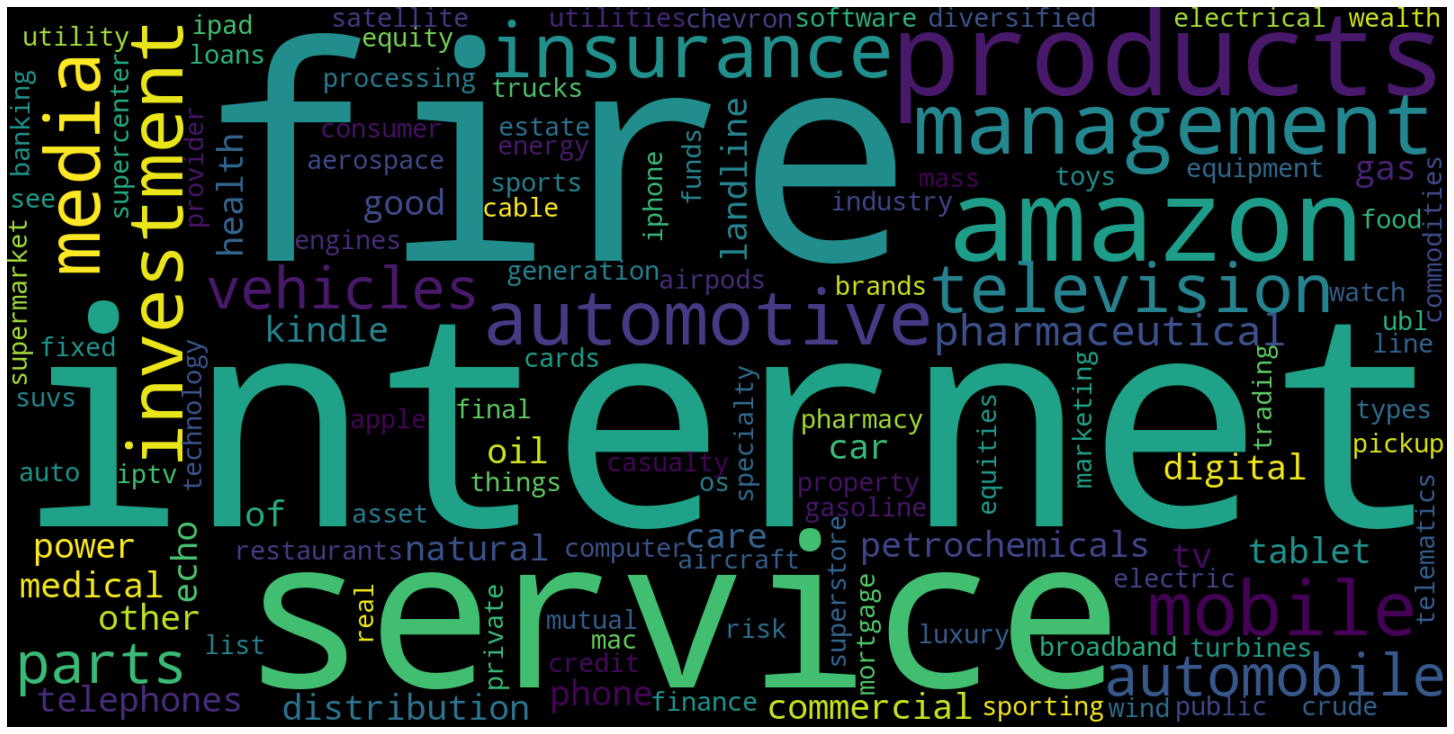

In [28]:
create_wordcloud(products)

In [29]:
for i in range(0,5):
    print(wiki_data[i]['industry'])

[[Retail]]
[[Energy industry|Energy]]: [[Oil and gas industry|Oil and gas]]
[[Conglomerate (company)|Conglomerate]]
{{Unbulleted list
|[[Consumer electronics]]
|[[Software services]]
|[[Online services]]}}
[[Managed care|Managed healthcare]]<br>[[Insurance]]


In [30]:

industries = []
for i, x in enumerate(wiki_data):
    industry = x['industry'].lower() # get industries and lowercase
    # replace 'and' with '|' and ']]' with empty space 
    industry = industry.replace(' and ', '|').replace(']]', '')
    # extract all industries
    industry = regex.findall(industry)
    # strip trailing and leading spaces
    industry = [i.strip() for i in industry]
    # filter rogue words and de-duplicate
    industry = list(set([i for i in industry if i not in rogue_words]))
    # add to data
    data[i]['industry'] = ', '.join(industry)
    # add to list of industries
    industries.extend(industry)

print(industries)

['retail', 'gas', 'energy industry', 'oil', 'energy', 'gas industry', 'company', 'conglomerate', 'online services', 'software services', 'consumer electronics', 'managed healthcare', 'insurance', 'managed care', 'healthcare', 'health insurance', 'pharmacy', 'managed care', 'managed healthcare', 'shop', 'health insurance in the united states', 'e-commerce', 'artificial intelligence', 'self-driving cars', 'entertainment', 'supermarket', 'cloud computing', 'consumer electronics', 'digital distribution', 'telecommunications', 'technology', 'technology company', 'telecommunications industry', 'automotive industry', 'automotive', 'automotive industry', 'automotive', 'pharmaceutical', 'ubl', 'gas', 'energy industry', 'petroleum industry', 'oil', 'energy', 'healthcare', 'retail', 'mass media', 'telecommunications', 'telecommunications industry', 'retail', 'company', 'conglomerate', 'retail', 'pharmaceutical industry', 'pharmaceuticals', 'retail industry', 'financial services']


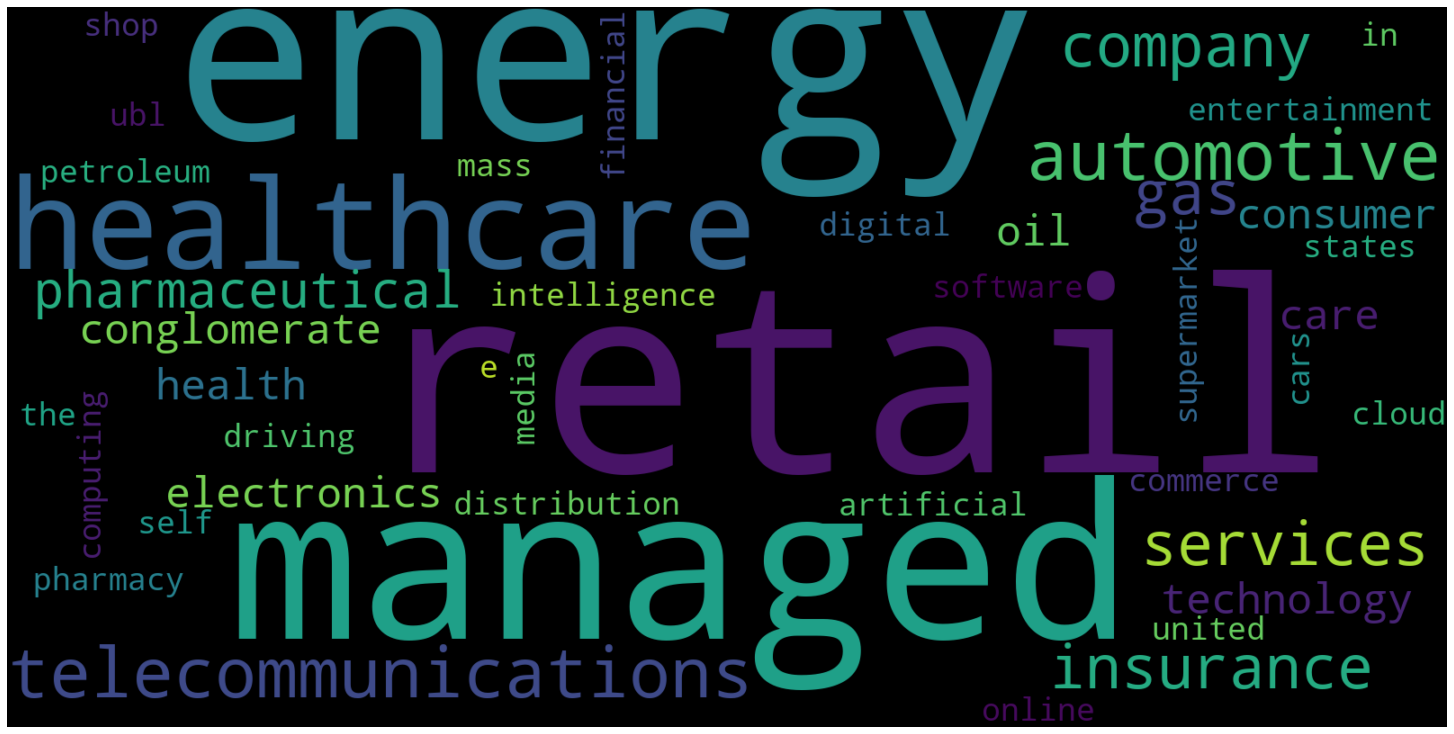

In [31]:
create_wordcloud(industries, ['industry']) # adding "industry" to the stopword list 


In [32]:
for i in range(0,len(wiki_data)):
    print(wiki_data[i]['assets'])

{{nowrap| |decrease| |US$|244.86 billion| (FY2022)|ref| name= N|}} {{decrease}} {{US$|244.86 billion}} (FY2022)
{{Increase}} US$338.923 billion (2021)
{{increase}} {{US$|958.8 billion}} (2021)
{{increase}} {{US$|351.02 billion}}
{{Increase}} {{US$|212.206 billion}} (2021)
{{decrease}} {{US$|63.30 billion}} (2022) {{rp|72}}
{{increase}} {{US$|232.99 billion}}
{{increase}} US$420.549 billion
{{increase}} {{US$|551.62}} billion
{{increase}} US$244.718 billion (2021)
{{decrease}} {{US$|257 billion}} (2021)
{{increase}} {{US$|57.34 billion}} (2021)
{{decrease}} {{US$|239.54 billion}} {{small|(2021)}}
{{increase}} US$44.45 billion {{small|(2021)}}
{{increase}} $64.17 {{nbsp}} billion
{{increase}} {{US$|366.60 billion}}
{{increase}} {{US$|49.086 billion}} (2022)
{{nowrap|Decrease| US$ 198.874 billion|ref| name=sec10kge2022 |rp|48| (2021)}} {{Decrease}} US$ 198.874 billion {{rp|48}} (2021)
{{nowrap|increase| US$90.124&nbsp;billion |small|(FY ended 8/31/2022)}} {{increase}} US$90.124&nbsp;billi

In [33]:

regex1 = re.compile('([\d\.]+)')

In [34]:

regex2 = re.compile('(billion|trillion)')

In [35]:
assets = []
for i, x in enumerate(wiki_data):
    y = x['assets'] # get assets
    z = regex1.findall(y)[0] # extract assets
    unit = regex2.findall(y)[0] # extract the unit
    asset = float(z) # convert to the numeric
    data[i]['assets'] = str(asset) + ' ' + unit # add to data
    # add to list of assets
    assets.append({'company' : x['company_name'], 'value' : asset, 'unit' : unit})

assets

[{'company': 'Walmart', 'value': 244.86, 'unit': 'billion'},
 {'company': 'ExxonMobil', 'value': 338.923, 'unit': 'billion'},
 {'company': 'Berkshire Hathaway', 'value': 958.8, 'unit': 'billion'},
 {'company': 'Apple Inc.', 'value': 351.02, 'unit': 'billion'},
 {'company': 'UnitedHealth Group', 'value': 212.206, 'unit': 'billion'},
 {'company': 'McKesson Corporation', 'value': 63.3, 'unit': 'billion'},
 {'company': 'CVS Health', 'value': 232.99, 'unit': 'billion'},
 {'company': 'Amazon (company)', 'value': 420.549, 'unit': 'billion'},
 {'company': 'AT&T', 'value': 551.62, 'unit': 'billion'},
 {'company': 'General Motors', 'value': 244.718, 'unit': 'billion'},
 {'company': 'Ford Motor Company', 'value': 257.0, 'unit': 'billion'},
 {'company': 'AmerisourceBergen', 'value': 57.34, 'unit': 'billion'},
 {'company': 'Chevron Corporation', 'value': 239.54, 'unit': 'billion'},
 {'company': 'Cardinal Health', 'value': 44.45, 'unit': 'billion'},
 {'company': 'Costco', 'value': 64.17, 'unit': 'bi

In [36]:

for i, asset in enumerate(assets):
    if asset['unit'] == 'trillion': # if unit is in trillion
        assets[i]['value'] = asset['value'] * 1000 # convert trillion to billion
        assets[i]['unit'] = 'billion'

In [37]:

df_assets = pd.DataFrame(assets)
df_assets

,company,value,unit
0,Walmart,244.860,billion
1,ExxonMobil,338.923,billion
2,Berkshire Hathaway,958.800,billion
3,Apple Inc.,351.020,billion
4,UnitedHealth Group,212.206,billion
5,McKesson Corporation,63.300,billion
6,CVS Health,232.990,billion
7,Amazon (company),420.549,billion
8,AT&T,551.620,billion
9,General Motors,244.718,billion


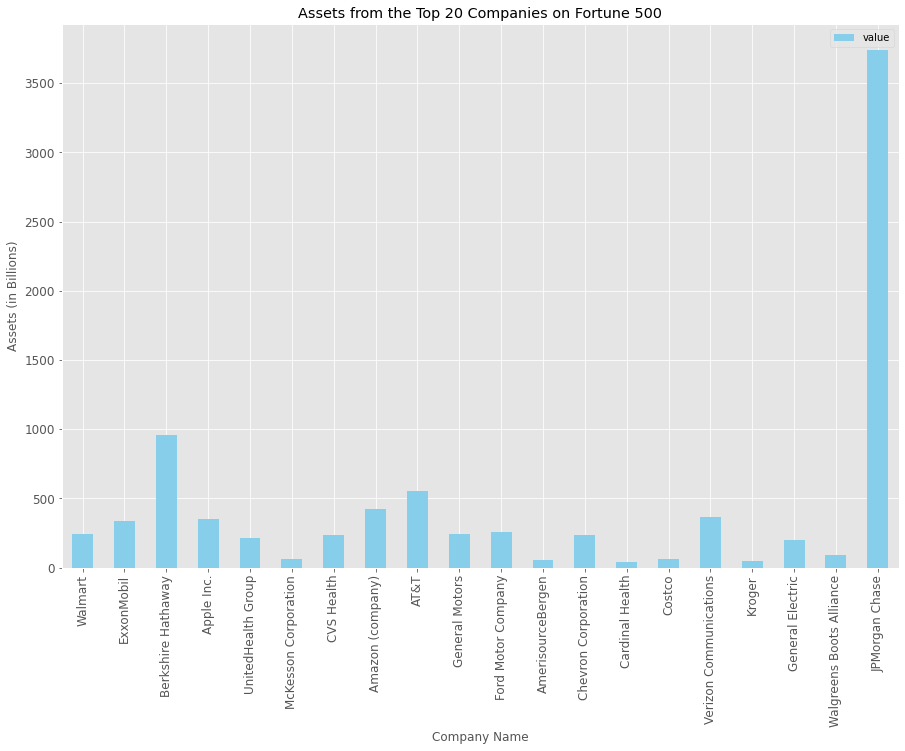

In [38]:
ax = df_assets.plot(kind='bar', 
               title ="Assets from the Top 20 Companies on Fortune 500",
               color='skyblue',
               figsize=(15, 10), 
               legend=True, 
               fontsize=12
              )

ax.set_xticklabels(df_assets.company)
ax.set_xlabel("Company Name", fontsize=12)
ax.set_ylabel("Assets (in Billions)", fontsize=12)
plt.show()

In [39]:
df_wiki = pd.DataFrame(data)
df_wiki.head()

,wiki_title,product,industry,assets
0,Walmart,,retail,244.86 billion
1,ExxonMobil,"power generation, oil products, crude oil, nat...","gas, energy industry, oil, energy, gas industry",338.923 billion
2,Berkshire Hathaway,"media, aerospace, automotive, mass media, insu...","company, conglomerate",958.8 billion
3,Apple Inc.,"apple watch, computer, ipad, iphone, mac, airpods","online services, software services, consumer e...",351.02 billion
4,UnitedHealth Group,,"managed healthcare, insurance, managed care",212.206 billion


In [40]:
# If you dont have the file, you can use the below code to fetch it:
import urllib.request
url = 'https://raw.githubusercontent.com/MonashDataFluency/python-web-scraping/master/data/fortune_500_companies.csv'
urllib.request.urlretrieve(url, 'fortune_500_companies.csv')

('fortune_500_companies.csv', <http.client.HTTPMessage at 0x7f9cff1f58e0>)

In [41]:
df = pd.read_csv('fortune_500_companies.csv', nrows=20) # reading only the first 20 rows
df = pd.concat([df, df_wiki], axis=1) # concatenating both the datasets
df

,rank,company_name,company_website,wiki_title,product,industry,assets
0,1,Walmart,http://www.stock.walmart.com,Walmart,,retail,244.86 billion
1,2,Exxon Mobil,http://www.exxonmobil.com,ExxonMobil,"power generation, oil products, crude oil, nat...","gas, energy industry, oil, energy, gas industry",338.923 billion
2,3,Berkshire Hathaway,http://www.berkshirehathaway.com,Berkshire Hathaway,"media, aerospace, automotive, mass media, insu...","company, conglomerate",958.8 billion
3,4,Apple,http://www.apple.com,Apple Inc.,"apple watch, computer, ipad, iphone, mac, airpods","online services, software services, consumer e...",351.02 billion
4,5,UnitedHealth Group,http://www.unitedhealthgroup.com,UnitedHealth Group,,"managed healthcare, insurance, managed care",212.206 billion
5,6,McKesson,http://www.mckesson.com,McKesson Corporation,"health care services, pharmaceuticals, medical...",healthcare,63.3 billion
6,7,CVS Health,http://www.cvshealth.com,CVS Health,,"health insurance, pharmacy, managed care, mana...",232.99 billion
7,8,Amazon.com,http://www.amazon.com,Amazon (company),"fire tv, amazon fire tablet, fire os, amazon e...","e-commerce, artificial intelligence, self-driv...",420.549 billion
8,9,AT&T,http://www.att.com,AT&T,"ubl, internet services, mobile telephones, fix...","telecommunications, technology, technology com...",551.62 billion
9,10,General Motors,http://www.gm.com,General Motors,"automobile parts, automobiles, car, commercial...","automotive industry, automotive",244.718 billion


In [42]:
df.to_csv('top_20_companies.csv', index=False)